In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Leemos los archivos iniciales
filesPath="C:\\Users\\carlo\\OneDrive\\Documentos\\Escuela\\DAI\\ProyectoFinalDai\\"
causesRaw = pd.read_csv(filesPath+"cause_of_deaths.csv", encoding="utf-8").rename({"Country/Territory": "Entity"}, axis=1).sort_values(by=["Entity", "Year"])
populationRaw = pd.read_csv(filesPath+"population.csv", encoding="utf-8").sort_values(by=["Entity", "Year"])

#Hacemos listas con los países y enfermedades asignadas por equipo
countryList = [
    "China",
    "United States",
    "Mexico",
    "Angola",
    "Argentina",
    "Pakistan",
    "Australia",
    "South Korea",
    "Slovakia",
    "France"
]

colsList = [
    "Diabetes Mellitus",
    "Nutritional Deficiencies",
    "Cardiovascular Diseases",
    "Protein-Energy Malnutrition",
    "Drug Use Disorders",
    "Neoplasms"
]

# Delimitamos las tablas según los países y enfermedades asignadas
population=pd.DataFrame()
for entity in countryList:
    population = pd.concat([population, populationRaw[populationRaw["Entity"]==entity]])
causes=pd.DataFrame()
ids=["Entity", "Code", "Year"]
for entity in countryList:
    causes = pd.concat([causes, causesRaw[causesRaw["Entity"]==entity].loc[:,ids+colsList]])

In [2]:
print("\n----------     1     -----------\n")

#Copiamos la tabla de las causas
percentage = causes.copy()

#Dividimos la cantidad de muertes entre las muertes totales y multpilicamos por cien para calcular el porcentaje
percentage.iloc[:, 3:] = percentage.iloc[:,3:].div(causes.sum(axis=1, numeric_only=True), axis="index")*100

print("Tabla de porcentajes: \n", percentage)
print(" ")


----------     1     -----------

Tabla de porcentajes: 
       Entity Code  Year  Diabetes Mellitus  Nutritional Deficiencies  \
1120   China  CHN  1990           1.724523                  1.037730   
1121   China  CHN  1991           1.703754                  1.025955   
1122   China  CHN  1992           1.716309                  0.905743   
1123   China  CHN  1993           1.737998                  0.828250   
1124   China  CHN  1994           1.762449                  0.764808   
...      ...  ...   ...                ...                       ...   
1915  France  FRA  2015           3.239003                  1.122832   
1916  France  FRA  2016           3.234999                  1.150057   
1917  France  FRA  2017           3.244750                  1.174768   
1918  France  FRA  2018           3.266243                  1.200740   
1919  France  FRA  2019           3.285376                  1.214506   

      Cardiovascular Diseases  Protein-Energy Malnutrition  \
1120          


----------     2     -----------



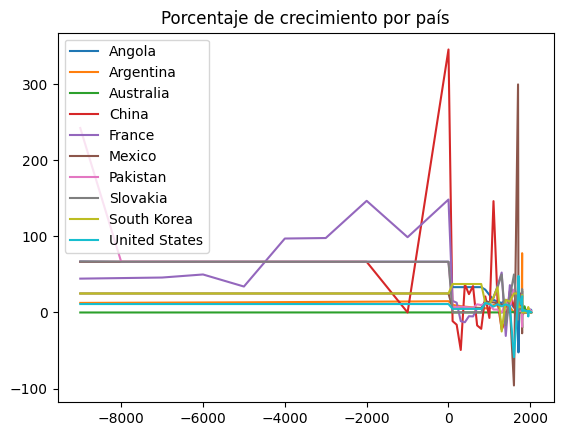

In [3]:
print("\n----------     2     -----------\n")
# Creamos un DataFrame con los años, sin repeticiones, como columnas
growth = pd.DataFrame(index=pd.unique(population["Year"]))

#Calculamos los porcentajes de crecimiento en las columnas de los países
for entity, df in population.groupby("Entity"):
    # Obtenemos la población por cada país
    growth[entity] = df["Population (historical estimates)"].values
growth=growth.pct_change()*100

#Graficamos
growth.plot(title="Porcentaje de crecimiento por país")
#Cerramos gráfica
plt.show()
plt.close()


----------     3     -----------



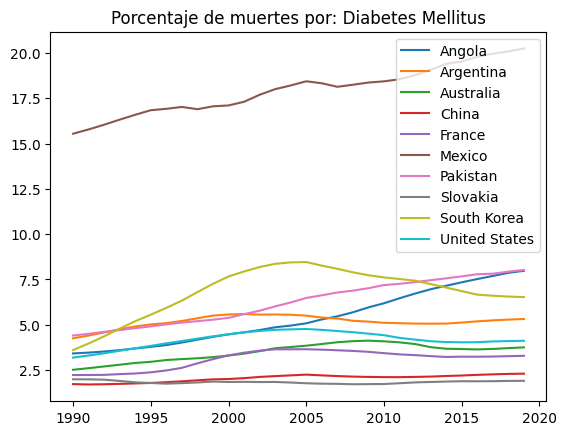

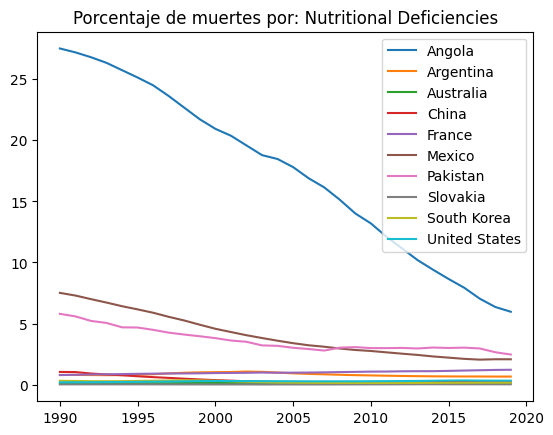

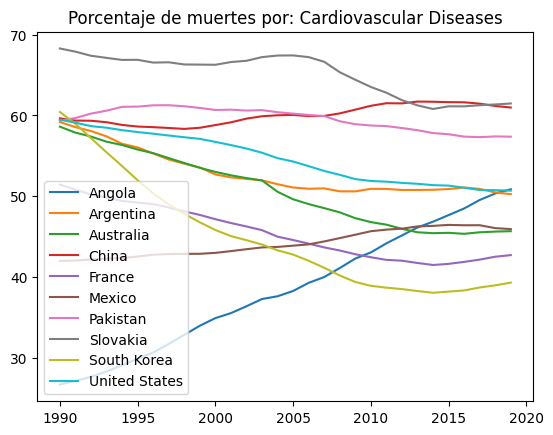

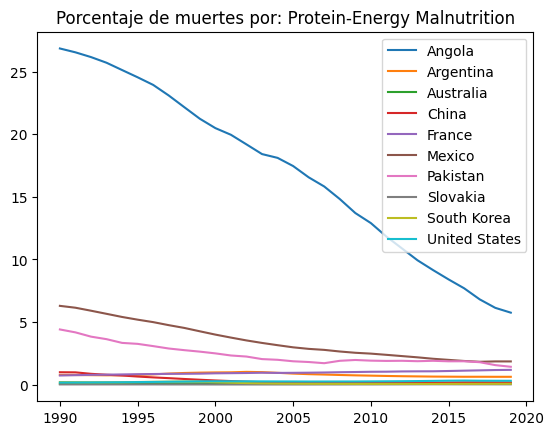

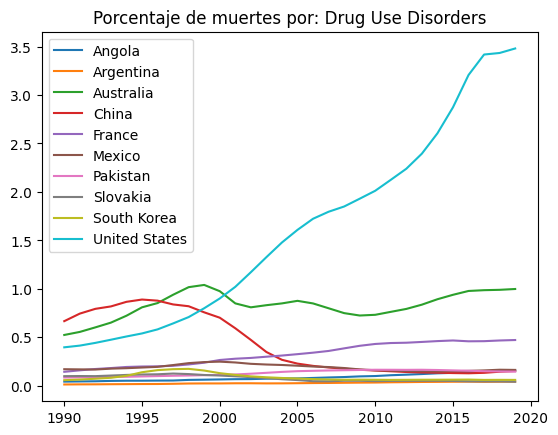

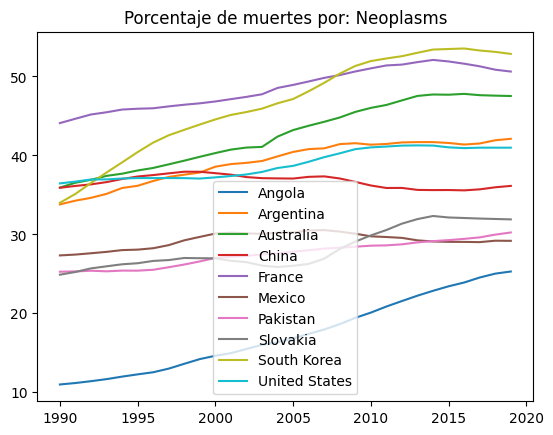

País con porcentajes máximos: 
 Diabetes Mellitus                     Mexico
Nutritional Deficiencies              Angola
Cardiovascular Diseases             Slovakia
Protein-Energy Malnutrition           Angola
Drug Use Disorders             United States
Neoplasms                        South Korea
dtype: object
 
País con porcentajes mínimos: 
 Diabetes Mellitus                  China
Nutritional Deficiencies        Slovakia
Cardiovascular Diseases           Angola
Protein-Energy Malnutrition     Slovakia
Drug Use Disorders             Argentina
Neoplasms                         Angola
dtype: object
 
Promedios: 
 Diabetes Mellitus               5.621399
Nutritional Deficiencies        2.790819
Cardiovascular Diseases        51.589167
Protein-Energy Malnutrition     2.546225
Drug Use Disorders              0.378318
Neoplasms                      35.492814
dtype: float64
 


In [4]:
print("\n----------     3     -----------\n")

#Iteramos sobre cada enfermedad asignada
for dis in colsList:
    #Creamos un Dataframe para guardar la info y graficat
    dfDis = pd.DataFrame(index=pd.unique(percentage["Year"]))
    #Analizaremos esta enfermedad sobre cada país requerido
    for entity, df in percentage.groupby("Entity"):
        #Obtenemos los valores de la enfemedad que queremos
        dfDis[entity] = df.loc[:, dis].values
    #Graficamos
    #El contador i nos sirve para saber en qué renglón y columna poner la subgráfica
    ax = dfDis.plot(title="Porcentaje de muertes por: "+dis)
    #Cerramos gráfica
    plt.show()
    plt.close()
    
    
#Encontramos el máximo para cada enfermedad y su id
maxes = percentage.idxmax(numeric_only=True)[1:]

#Actualizamos, le damos a max como valores el nombre de los países y como índice el nombre de la enfermedad
maxes.update(pd.Series(percentage.loc[maxes, 'Entity'].values, index=maxes.index))

#Repetimos proceso para min
mins = percentage.idxmax(numeric_only=True)[1:]
mins.update(pd.Series(percentage.loc[percentage.idxmin(numeric_only=True)[1:], 'Entity'].values, index=mins.index))

print("País con porcentajes máximos: \n", maxes)
print(" ")
print("País con porcentajes mínimos: \n", mins)
print(" ")
#Calculamos el promedio de las columnas de las enfermedades
print("Promedios: \n", percentage.iloc[:,3:].mean())
print(" ")


----------     4     -----------



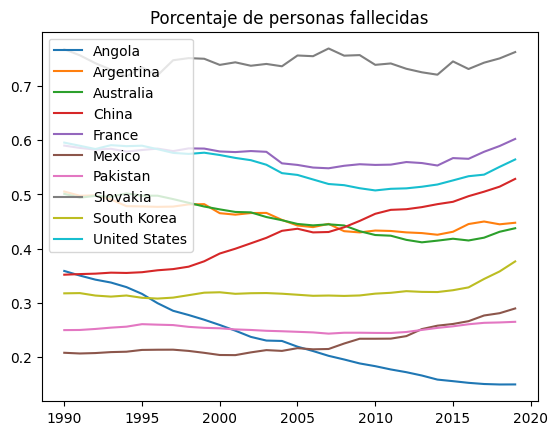

País con mayor porcentaje de muertes:  Slovakia
País con menor porcentaje de muertes:  Angola


In [5]:
print("\n----------     4     -----------\n")

#Creamos un nuevo dataframe, guardamos datos de poblacion y solo los valores de entidad, código y año de tabla de causas
#Hacemos este inner join para evitar tener datos incompletos que afecten el resultado
populDeaths = pd.merge(population, causes.iloc[:,[0,1,2]], how="inner", on=["Entity", "Code", "Year"])

#Obtenemos la suma de la cantidad de muertes por año por país
populDeaths["Total Deaths"] = causes.iloc[:,3:].sum(axis=1).values

#Calculamos el porcentaje de estas muertes respecto al estimado de población
populDeaths["Death Percentage"] = populDeaths["Total Deaths"]/populDeaths["Population (historical estimates)"]*100

#Creamos un data frame para graficar con los años como índice
deathPercentages=pd.DataFrame(index=pd.unique(populDeaths["Year"]))

#Iteramos sobre cada país asignado
for entity, df in populDeaths.groupby("Entity"):
    #Obtenemos los valores del porcentaje de muertes y lo guardamos en una columna del data frame previamente definido
    deathPercentages[entity]=df["Death Percentage"].values
    
#Graficamos la colección de todos los países
deathPercentages.plot(title="Porcentaje de personas fallecidas")
#Cerramos gráfica
plt.show()
plt.close()

#Obtenemos posición de valores
idMax=populDeaths["Death Percentage"].idxmax()
idMin=populDeaths["Death Percentage"].idxmin()

#Obtenemos nombre utilizando la posición obtenida
print("País con mayor porcentaje de muertes: ", populDeaths.iloc[idMax,0])
print("País con menor porcentaje de muertes: ", populDeaths.iloc[idMin,0])


----------     5     -----------



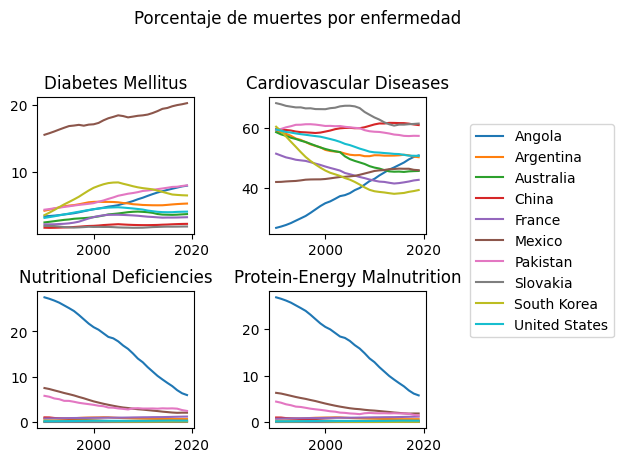

In [6]:
print("\n----------     5     -----------\n")

#Definimos una lista con las enfermedades asignadas en este problema
colsList2 = [
    "Diabetes Mellitus",
    "Cardiovascular Diseases",
    "Nutritional Deficiencies",
    "Protein-Energy Malnutrition"
]

# Con matplotlib creamos una figura de 2 rengolnes y 2 columnas para subgráficas
#Además, especificamos el ratio de las colmnas y filas
fig, axes = plt.subplots(nrows=3, ncols=3,  width_ratios=[2,2,1], height_ratios=[1,20,20])
fig.tight_layout(pad=2) #Añadimos espacio
fig.suptitle("Porcentaje de muertes por enfermedad") #Añadimos título

i=2    # contador

#Iteramos sobre cada enfermedad sobre la que queremos graficar
for dis in colsList2:
    # Dataframe para guardar la info y graficar
    dfDis = pd.DataFrame(index=pd.unique(percentage["Year"]))
    
    #Analizaremos esta enfermedad sobre cada país requerido
    for entity, df in percentage.groupby("Entity"):
        dfDis[entity]=df.loc[:,dis].values
        
    #Graficamos
    #El contador i nos sirve para saber en qué renglón y columna poner la subgráfica
    ax = dfDis.plot(title=dis, ax=axes[i//2,(i+2)%2], legend=False)
    i+=1
    
#Guardamos las etiquetas en una variable
han, lab = ax.get_legend_handles_labels()

#Ocultamos las gráficas de la última columna y de la primera fila
axes[0,0].set_visible(False)
axes[0,1].set_visible(False)
axes[0,2].set_visible(False)
axes[1,2].set_visible(False)
axes[2,2].set_visible(False)

#Ponemos en su lugar una leyenda
fig.legend(han, lab, loc="center right")

#Cerramos gráfica
plt.show()
plt.close()


----------     6     -----------



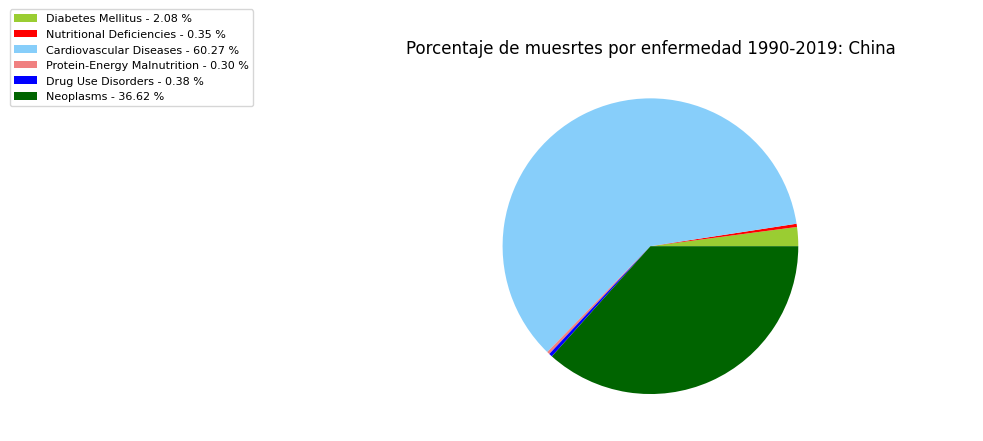

Enfermedad con mayor porcentaje de muertes en China:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en China:  Protein-Energy Malnutrition
 


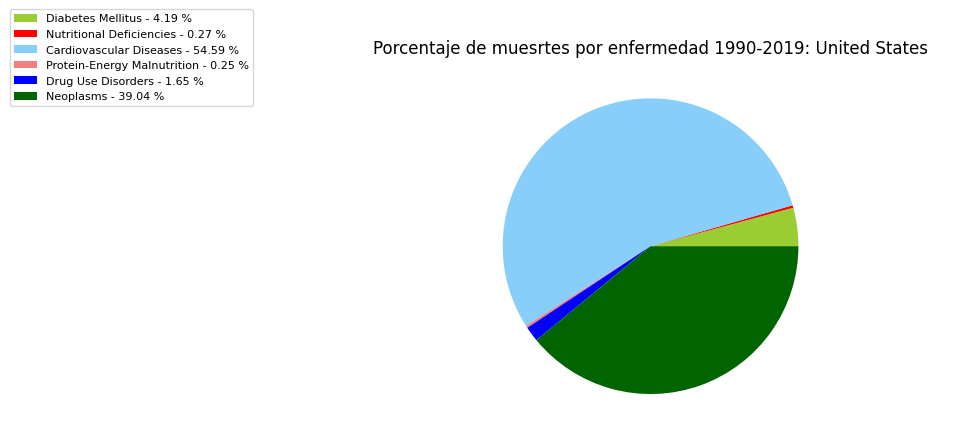

Enfermedad con mayor porcentaje de muertes en United States:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en United States:  Protein-Energy Malnutrition
 


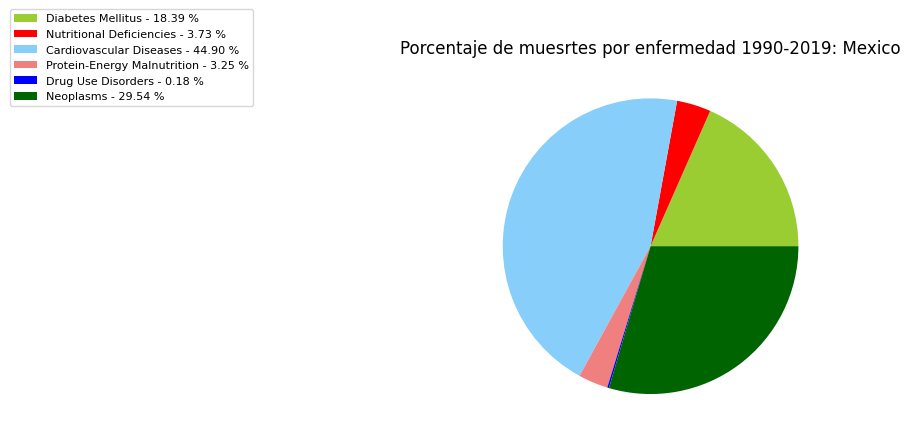

Enfermedad con mayor porcentaje de muertes en Mexico:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Mexico:  Drug Use Disorders
 


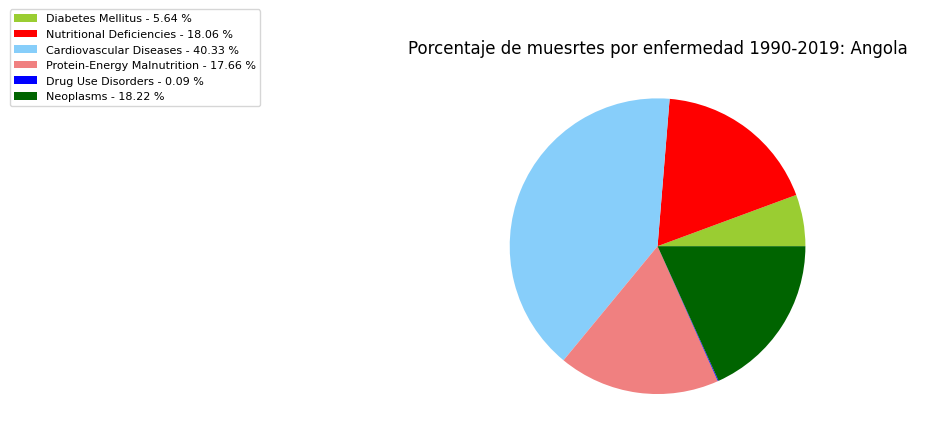

Enfermedad con mayor porcentaje de muertes en Angola:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Angola:  Drug Use Disorders
 


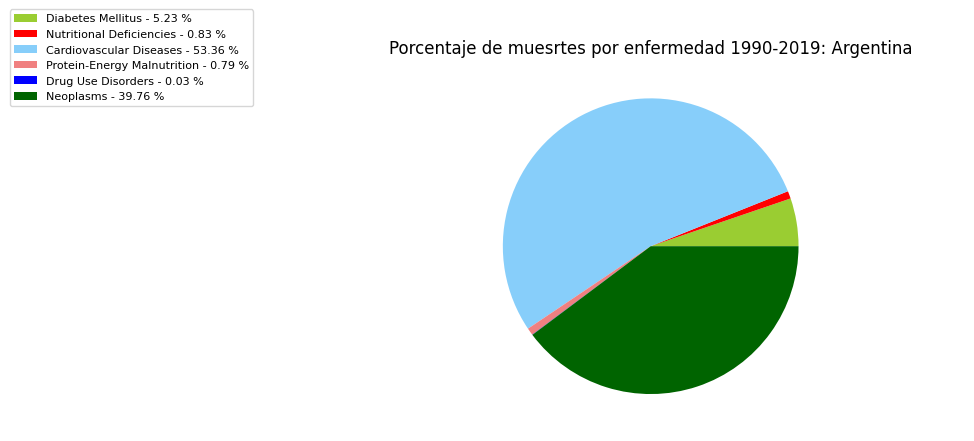

Enfermedad con mayor porcentaje de muertes en Argentina:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Argentina:  Drug Use Disorders
 


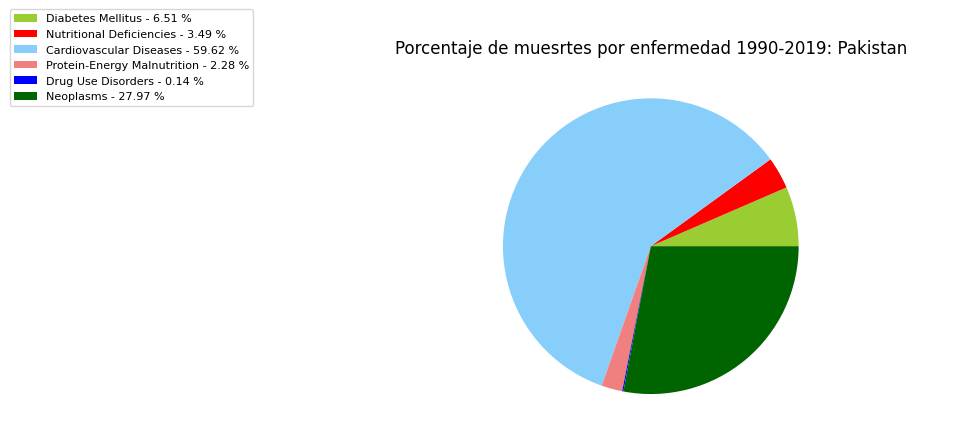

Enfermedad con mayor porcentaje de muertes en Pakistan:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Pakistan:  Drug Use Disorders
 


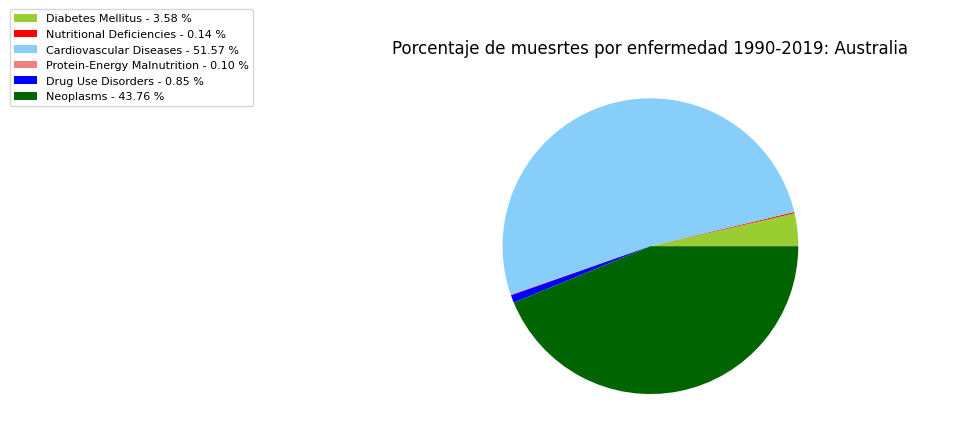

Enfermedad con mayor porcentaje de muertes en Australia:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Australia:  Protein-Energy Malnutrition
 


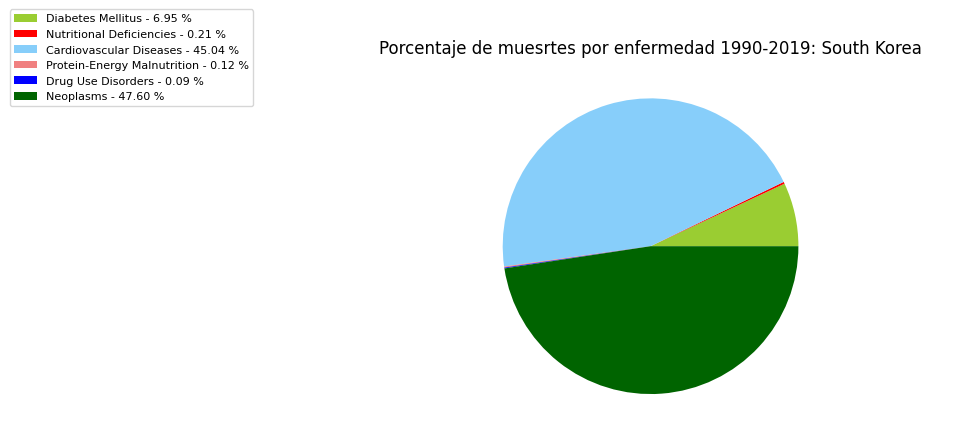

Enfermedad con mayor porcentaje de muertes en South Korea:  Neoplasms
Enfermedad con menor porcentaje de muertes en South Korea:  Drug Use Disorders
 


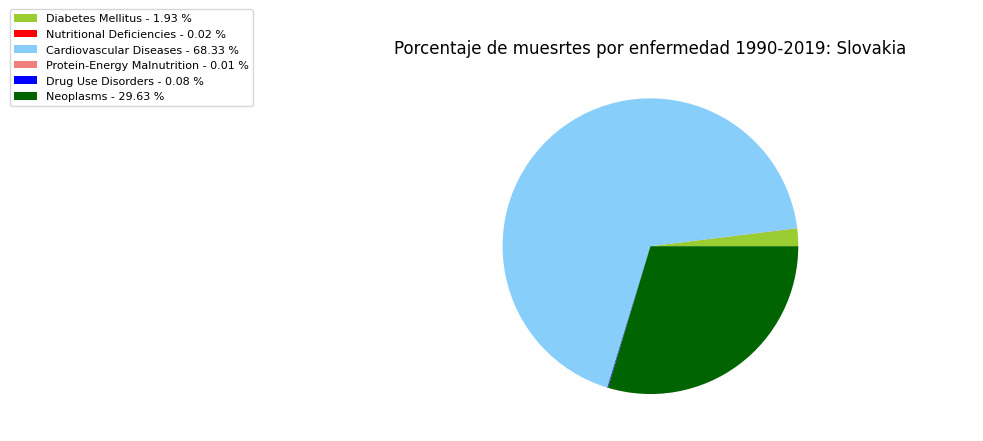

Enfermedad con mayor porcentaje de muertes en Slovakia:  Cardiovascular Diseases
Enfermedad con menor porcentaje de muertes en Slovakia:  Protein-Energy Malnutrition
 


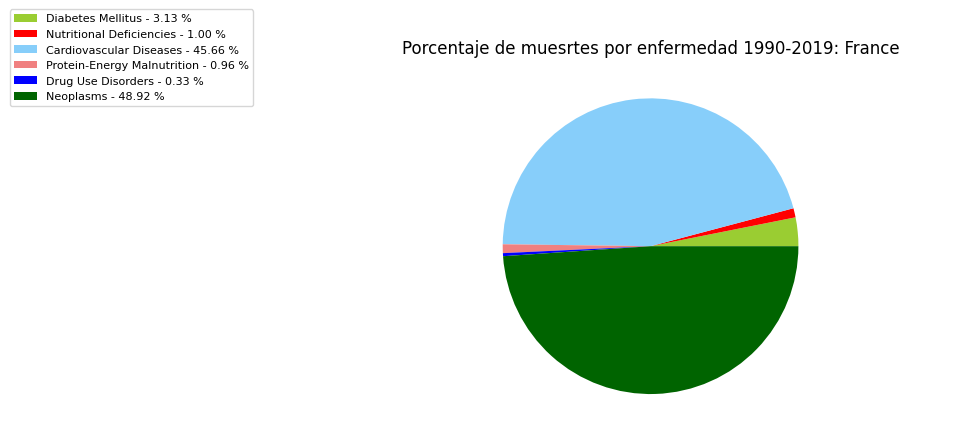

Enfermedad con mayor porcentaje de muertes en France:  Neoplasms
Enfermedad con menor porcentaje de muertes en France:  Drug Use Disorders
 


In [7]:
print("\n----------     6     -----------\n")

#Colores para la gráfica
colors = ['yellowgreen','red','lightskyblue','lightcoral','blue', 'darkgreen','yellow','grey','violet','magenta','cyan']

#Iteramos sobre la lista de países
for entity in countryList:
    
    #Creamos figura
    fig = plt.figure()
    
    #Obtenemos en un DataFrame la información de la cantidad de muertes por año
    #Sumamos todas y obtenemos las muertes totales por enfermedad
    df = causes[causes["Entity"] == entity].set_index("Year").loc[:, colsList].sum()
    
    #Graficamos
    #Ocultamos el texto al hacerlo blanco
    ax = df.plot.pie(title="Porcentaje de muesrtes por enfermedad 1990-2019: "+entity, colors=colors, textprops={'color':"w"})
    
    #Obtenemos la info de las etiquetas
    patches, texts = ax.get_legend_handles_labels()
    
    #Le damos formato a las etiquetas para que muestren enfermedad y porcentaje
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df.index.values, df.values/df.sum()*100)]
    
    #Enseñamos las etiquetas
    fig.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),fontsize=8)
    
    #Cerramos gráfica
    plt.show()
    plt.close()
    
    #Obtenemos el nombre (id) de la enfermedad con máximo y mínimo porcentaje
    print("Enfermedad con mayor porcentaje de muertes en "+entity+": ", df.idxmax())
    print("Enfermedad con menor porcentaje de muertes en "+entity+": ", df.idxmin())
    print(" ")